# Graph Analysis Techniques without Feature Learning

# Graph clustering

## Lab 2 : NCut

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML_May23_codes/codes/03_Traditional_GML/01_graph_clustering'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import construct_kernel
from lib.utils import compute_kernel_kmeans_EM
from lib.utils import compute_kernel_kmeans_spectral
from lib.utils import compute_purity
from lib.utils import construct_knn_graph
from lib.utils import compute_ncut
from lib.utils import compute_pcut
from lib.utils import graph_laplacian

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

4000 4 4


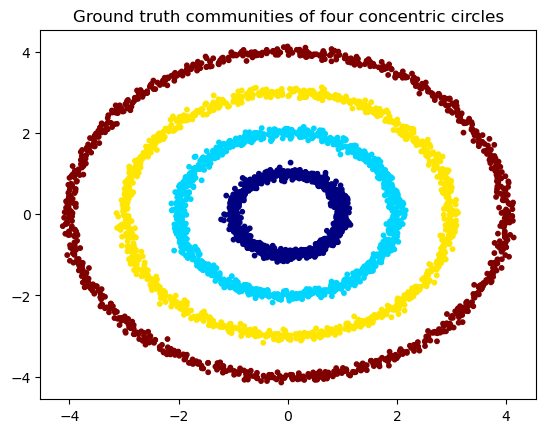

In [3]:
# Load raw data images
mat = scipy.io.loadmat('datasets/four_circles.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt'] - 1; Cgt = Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,d,nc)

plt.figure(200)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('Ground truth communities of four concentric circles')
plt.show()

Construct Linear Kernel


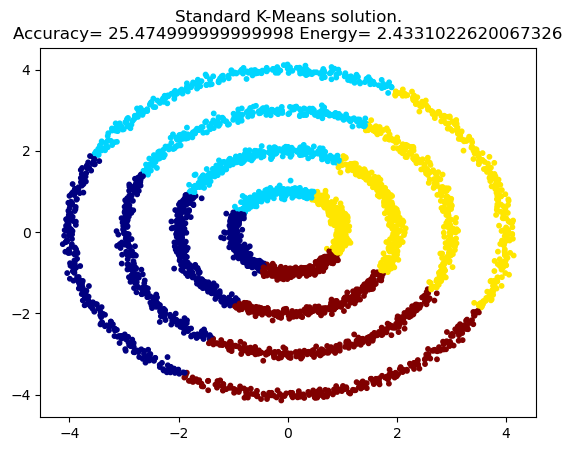

Construct kNN Gaussian Kernel
Construct Linear Kernel


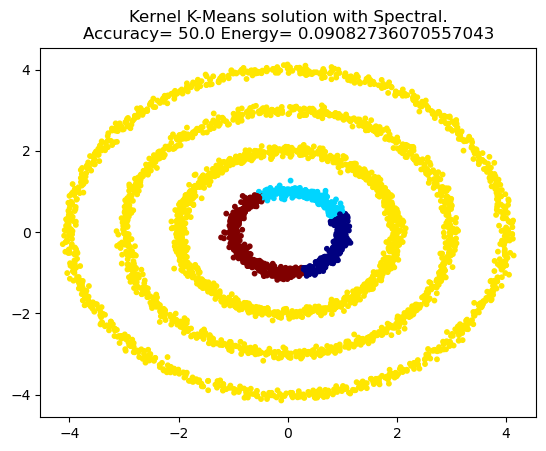

In [4]:
# Run Standard/Linear K-Means
Theta = np.ones(n) # Equal weight for each data
# Compute linear Kernel for standard K-Means
Ker = construct_kernel(X,'linear')
# Standard K-Means
C_kmeans, En_kmeans = compute_kernel_kmeans_EM(nc,Ker,Theta,10)
# Plot
plt.figure(201)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans)
plt.title('Standard K-Means solution.\nAccuracy= ' + str(compute_purity(C_kmeans,Cgt,nc)) +
         ' Energy= ' + str(En_kmeans))
plt.show()

# Run Kernel/Non-Linear K-Means with Spectral approach
Ker = construct_kernel(X,'kNN_gaussian',100)
# Kernel K-Means with Spectral approach
C_kmeans, En_kmeans = compute_kernel_kmeans_spectral(nc,Ker,Theta,10)
# Plot
plt.figure(202)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans, color=pyplot.jet())
plt.title('Kernel K-Means solution with Spectral.\nAccuracy= ' + 
          str(compute_purity(C_kmeans,Cgt,nc)) + ' Energy= ' + str(En_kmeans))
plt.show()

k-NN graph with Zelnik-Perona technique


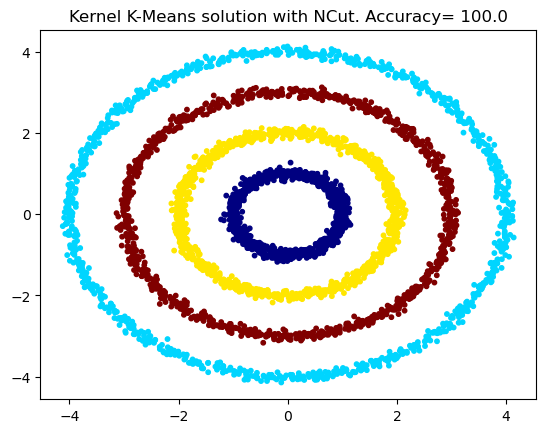

In [5]:
W = construct_knn_graph(X,50,'euclidean_zelnik_perona')
Cncut,acc = compute_ncut(W,Cgt,nc)

# Plot
plt.figure(203)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Kernel K-Means solution with NCut. Accuracy= ' + 
          str(compute_purity(Cncut,Cgt,nc)) )
plt.show()